In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [181]:
Assoc_Salary = pd.read_csv('../Data/Associate_degree_money_made.csv', skiprows = 19, nrows = 9)
Bachelor_Salary = pd.read_csv('../Data/Bachelors_Weekly_Salary.csv', skiprows = 19, nrows = 9)
Associate_Cost_Data = pd.read_csv('../Data/Cost_of_College_2020.csv', skiprows = 49, nrows = 9)
Bachelor_Cost_Data = pd.read_csv('../Data/Cost_of_College_2020.csv', skiprows=49, nrows = 9)
Associate_Cost_Data

,2010-11,"21,496","25,682","10,318","11,140","15,062","3,560","5,675","5,841","3,577",...,"8,868","9,575","12,945","3,060","4,878","5,020","3,074","4,023","4,108","2,734"
0,2011-12,"21,930","26,010","10,565","11,505","15,341","3,667","5,748","5,905","3,618",...,"9,347","10,179","13,572","3,244","5,085","5,224","3,201","4,138","4,215","2,901"
1,2012-13,"22,496","26,541","10,644","11,876","15,677","3,693","5,888","6,041","3,714",...,"9,573","10,681","14,099","3,322","5,296","5,433","3,340","4,256","4,338","2,911"
2,2013-14,"22,984","27,041","10,828","12,122","15,942","3,688","6,043","6,190","3,877",...,"9,891","11,073","14,563","3,369","5,520","5,654","3,541","4,402","4,484","2,981"
3,2014-15,"23,616","27,615","11,034","12,485","16,256","3,684","6,215","6,359","3,972",...,"10,153","11,487","14,957","3,389","5,719","5,850","3,655","4,523","4,602","3,109"
4,2015-16,"24,224","28,211","11,235","12,806","16,564","3,683","6,386","6,523","4,155",...,"10,407","11,862","15,343","3,412","5,915","6,043","3,849","4,662","4,747","3,147"
5,2016-17,"24,478","28,189","11,234","12,953","16,443","3,730","6,473","6,605","4,168",...,"10,597","12,219","15,512","3,519","6,107","6,231","3,932","4,766","4,850","3,147"
6,2017-18,"24,707","28,360","11,096","13,076","16,507","3,667","6,552","6,688","4,071",...,"10,704","12,613","15,923","3,537","6,321","6,451","3,926","4,899","4,982","3,240"
7,2018-19,"25,004","28,121","11,568","13,215","16,571","3,619","6,645","6,779","4,189",...,"11,390","13,012","16,316","3,563","6,542","6,674","4,125","5,065","5,131","3,702"
8,2019-20,"25,281","28,775","11,391","13,360","16,647","3,621","6,743","6,878","4,162",...,"11,391","13,360","16,647","3,621","6,743","6,878","4,162","5,177","5,250","3,608"


In [26]:
## Convert string to numbers
def cast_to_numeric(string):
    if type(string) == float:
        return string
    else:
        string = string.replace(',', '').replace('$', '')
        number = float(string)
        return number

In [183]:
## Associate Yearly Salary
Associate_Quarters_Total = Assoc_Salary['Qtr1'] + Assoc_Salary['Qtr2'] + Assoc_Salary['Qtr3'] + Assoc_Salary['Qtr4']
Associate_Yearly_Salary = Associate_Quarters_Total / 4 * 52

## Bachelor Yearly Salary
Bachelor_Quarters_Total = Bachelor_Salary['Qtr1'] + Bachelor_Salary['Qtr2'] + Bachelor_Salary['Qtr3'] + Bachelor_Salary['Qtr4']
Bachelor_Yearly_Salary = Bachelor_Quarters_Total / 4 * 52

In [176]:
## Cost of Associate Degree
Associate_Cost_Data['8,868'] = Associate_Cost_Data['8,868'].apply(cast_to_numeric)
Total_Associate_Cost = Associate_Cost_Data['8,868'] * 2

## Cost of Bachelor Degree
Bachelor_Cost_Data['22,074'] = Bachelor_Cost_Data['22,074'].apply(cast_to_numeric)
Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 4

In [219]:
## Years to pay off Associate degree
AS_Years_Paid_Off = Total_Associate_Cost / (Associate_Yearly_Salary * 0.08)

## Years to pay off Bachelor degree
BA_Years_Paid_Off = Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

In [138]:
## Inflation rate data set (from BLS)
Inflation_Rate = pd.DataFrame(
                    {'Inflation': [18.78, 15.4, 13.56, 11.83, 11.92, 10.41, 7.72, 5.53, 3.92, 1.4], 
                    'Years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]})

In [221]:
## If someone went to a 4 year for 6 years
Six_Year_Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 6
Six_Year_BA_Years_Paid_Off = Six_Year_Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

## If someone went to a 4 year for 5 years
Five_Year_Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 5
Five_Year_BA_Years_Paid_Off = Five_Year_Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

## If someone went to a 4 year for 3 years
Three_Year_Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 3
Three_Year_BA_Years_Paid_Off = Three_Year_Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

## If someone went to a 4 year for 2 years
Two_Year_Total_Bachelor_Cost = Bachelor_Cost_Data['22,074'] * 2
Two_Year_BA_Years_Paid_Off = Two_Year_Total_Bachelor_Cost / (Bachelor_Yearly_Salary * 0.08)

In [162]:
## If someone went to a 2 year for 3 years
Three_Year_Total_Associate_Cost = Associate_Cost_Data['8,868'] * 3
Three_Year_AS_Years_Paid_Off = Three_Year_Total_Associate_Cost / (Associate_Yearly_Salary * 0.08)
## If someone went to a 2 year for 1 year
One_Year_Total_Associate_Cost = Associate_Cost_Data['8,868']
One_Year_AS_Years_Paid_Off = One_Year_Total_Associate_Cost / (Associate_Yearly_Salary * 0.08)
print(Three_Year_AS_Years_Paid_Off)
print()
print()

In [187]:
## Money made from Bachelor Degree after 5 years
Five_Years_After_Bachelor = Bachelor_Yearly_Salary * 5
## 10 years
Ten_Years_After_Bachelor = Bachelor_Yearly_Salary * 10
## 15 years
Fifteen_Years_After_Bachelor = Bachelor_Yearly_Salary * 15
## 20 years
Twenty_Years_After_Bachelor = Bachelor_Yearly_Salary * 20

In [186]:
## Money made from Associate Degree after 5 years
Five_Years_After_Associate = Associate_Yearly_Salary * 5
## 10 years
Ten_Years_After_Associate = Associate_Yearly_Salary * 10
## 15 years
Fifteen_Years_After_Associate = Associate_Yearly_Salary * 15
## 20 years
Twenty_Years_After_Associate = Associate_Yearly_Salary * 20

Descriptive Statstics

In [142]:
AYSDS = Associate_Yearly_Salary.describe()
BYSDS = Bachelor_Yearly_Salary.describe()
TACDS = Total_Associate_Cost.describe()
TBCDS = Total_Bachelor_Cost.describe()
AYPODS = AS_Years_Paid_Off.describe()
BYPODS = BA_Years_Paid_Off.describe()
IRDS = Inflation_Rate.describe()
OBCDS = Original_Bachelor_Cost.describe()
OACDS = Original_Bachelor_Cost.describe()

Visuals

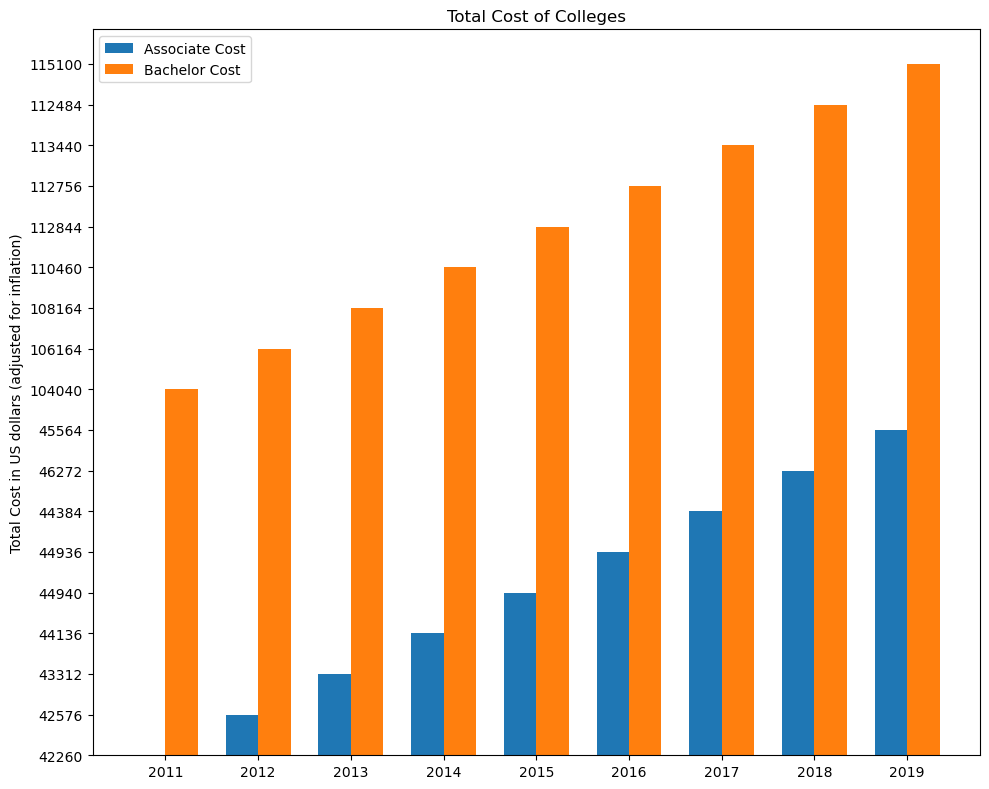

In [218]:
## Associate vs Bachelor Costs each year
labels = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
Bar_Chart_Associate_Cost = ['42260', '42576', '43312', '44136', '44940', '44936', '44384', '46272', '45564']
Bar_Chart_Bachelor_Cost = ['104040', '106164', '108164', '110460', '112844', '112756', '113440', '112484', '115100']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Bar_Chart_Associate_Cost, width, label = 'Associate Cost')
rects2 = ax.bar(x + width/2, Bar_Chart_Bachelor_Cost, width, label = 'Bachelor Cost')

ax.set_ylabel('Total Cost in US dollars (adjusted for inflation)')
ax.set_title('Total Cost of Colleges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


##ax.bar_label(rects1, padding=3)
##ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

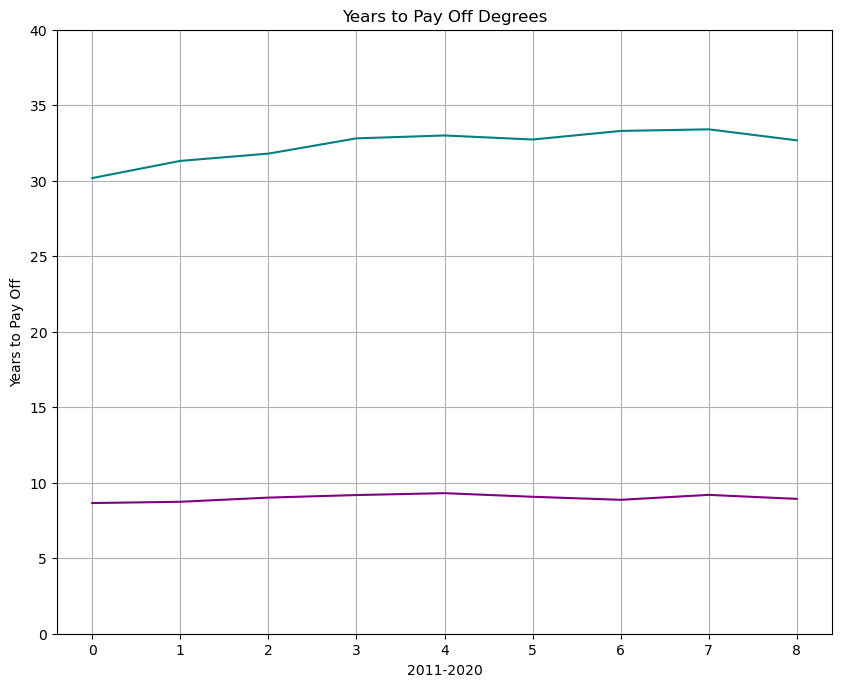

In [210]:
## How long to pay off each degree from the academic year 2011-2012 to 2019-2020
S1 = AS_Years_Paid_Off
S2 = BA_Years_Paid_Off

fig, ax = plt.subplots()
ax.plot(S1, label='Associate Degree', color='purple')
ax.plot(S2, label='Bachelor Degree', color='teal')
ax.set_ylim([0, 40])
ax.set_title('Years to Pay Off Degrees')
ax.set_xlabel('2011-2020')
ax.set_ylabel('Years to Pay Off')
ax.grid()

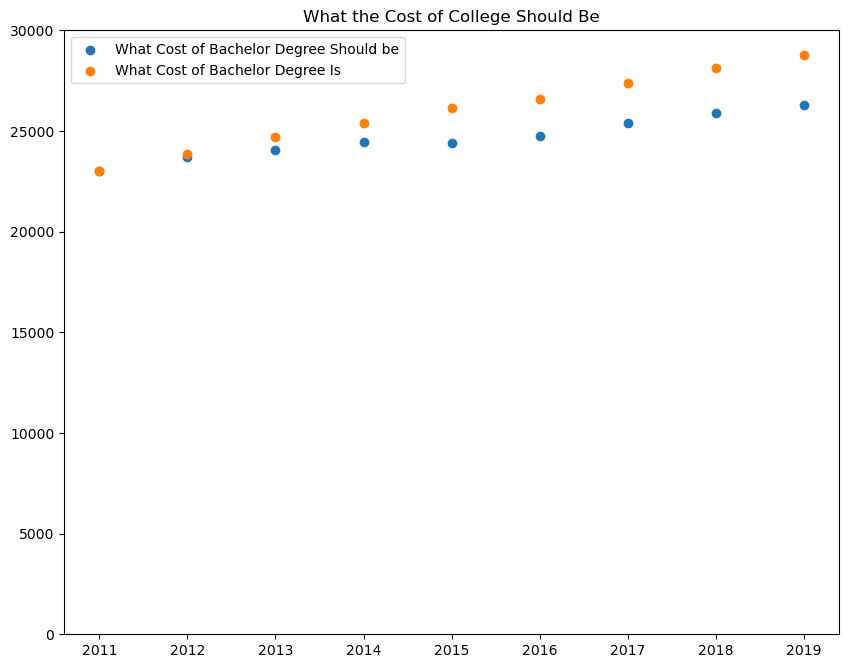

In [211]:
## This graph shows the cost of just one year of college, not all four years combined
IDEK_Bachelor = Bachelor_Cost_Data['22,074']
Bachelor_Cost_Data['22,074'] = Bachelor_Cost_Data['22,074'].apply(cast_to_numeric)

x = 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
y1 = 23011, 23684, 24061, 24441, 24419, 24755, 25374, 25899, 26301
y2 = Bachelor_Cost_Data['22,074']

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y1, label=f'What Cost of Bachelor Degree Should be')
plt.scatter(x, y2, label=f'What Cost of Bachelor Degree Is')
plt.ylim([0,30000])

plt.title('What the Cost of College Should Be')
plt.legend()
plt.show()

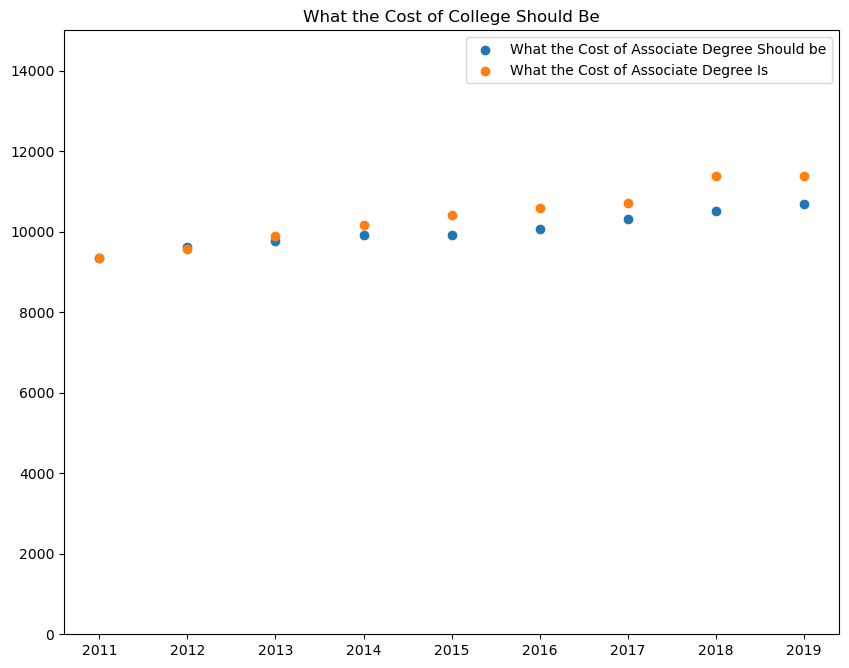

In [213]:
## This graph shows the cost of just one year of college, not all four years combined
IDEK_Associate = Associate_Cost_Data['8,868']
Associate_Cost_Data['8,868'] = Associate_Cost_Data['8,868'].apply(cast_to_numeric)

x = 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019
y1 = 9347, 9620, 9773, 9928, 9919, 10055, 10306, 10520, 10683
y2 = Associate_Cost_Data['8,868']

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(x, y1, label=f'What the Cost of Associate Degree Should be')
plt.scatter(x, y2, label=f'What the Cost of Associate Degree Is')
plt.ylim([0,15000])

plt.title('What the Cost of College Should Be')
plt.legend()
plt.show()

In [158]:
print(Five_Years_After_Associate)
print()
print(Ten_Years_After_Associate)
print()
print(Fifteen_Years_After_Associate)
print()
print(Twenty_Years_After_Associate)

0    135005.0
1    136955.0
2    137150.0
3    138190.0
4    139750.0
5    146055.0
6    150865.0
7    154830.0
8    159445.0
dtype: float64

0    270010.0
1    273910.0
2    274300.0
3    276380.0
4    279500.0
5    292110.0
6    301730.0
7    309660.0
8    318890.0
dtype: float64

0    405015.0
1    410865.0
2    411450.0
3    414570.0
4    419250.0
5    438165.0
6    452595.0
7    464490.0
8    478335.0
dtype: float64

0    540020.0
1    547820.0
2    548600.0
3    552760.0
4    559000.0
5    584220.0
6    603460.0
7    619320.0
8    637780.0
dtype: float64


In [159]:
print(Five_Years_After_Bachelor)
print()
print(Ten_Years_After_Bachelor)
print()
print(Fifteen_Years_After_Bachelor)
print()
print(Twenty_Years_After_Bachelor)

0    135005.0
1    136955.0
2    137150.0
3    138190.0
4    139750.0
5    146055.0
6    150865.0
7    154830.0
8    159445.0
dtype: float64

0    270010.0
1    273910.0
2    274300.0
3    276380.0
4    279500.0
5    292110.0
6    301730.0
7    309660.0
8    318890.0
dtype: float64

0    405015.0
1    410865.0
2    411450.0
3    414570.0
4    419250.0
5    438165.0
6    452595.0
7    464490.0
8    478335.0
dtype: float64

0    540020.0
1    547820.0
2    548600.0
3    552760.0
4    559000.0
5    584220.0
6    603460.0
7    619320.0
8    637780.0
dtype: float64
